In [3]:

pip install pandas numpy matplotlib seaborn scikit-learn

Saving census-income.data to census-income.data

--- Shape ---
 (199523, 42)

--- Column Names ---
 ['age', 'class_of_worker', 'industry_code', 'occupation_code', 'education', 'wage_per_hour', 'enrolled_in_edu_last_wk', 'marital_status', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'tax_filer_status', 'region_prev_residence', 'state_prev_residence', 'detailed_household_family_stat', 'detailed_household_summary', 'instance_weight', 'migration_code_change_in_msa', 'migration_code_change_in_reg', 'migration_code_move_within_reg', 'live_in_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_veteran

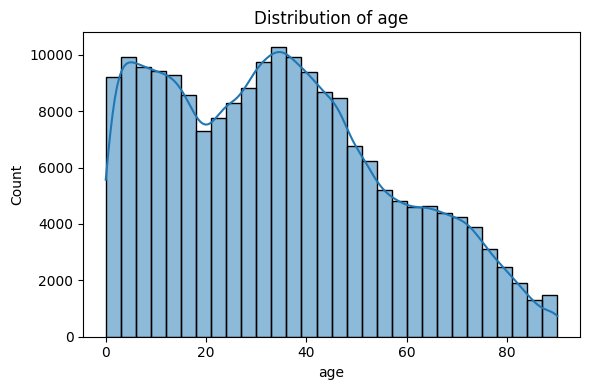

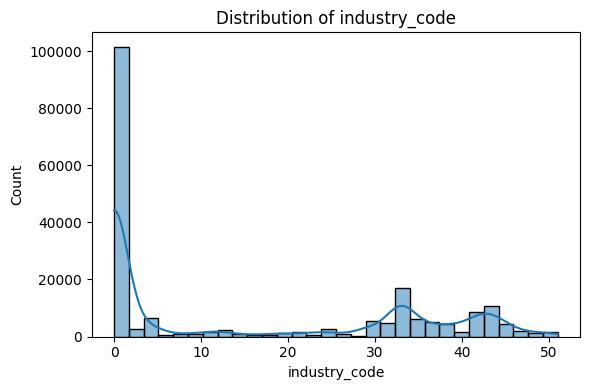

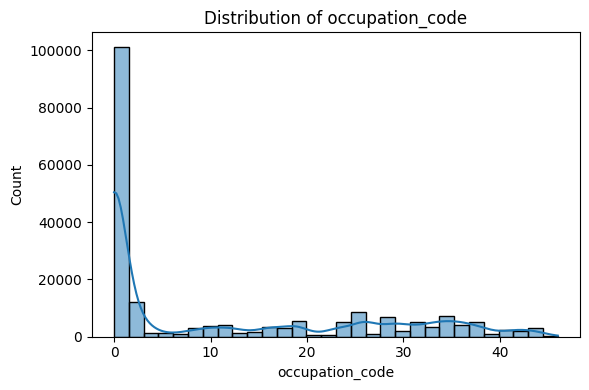

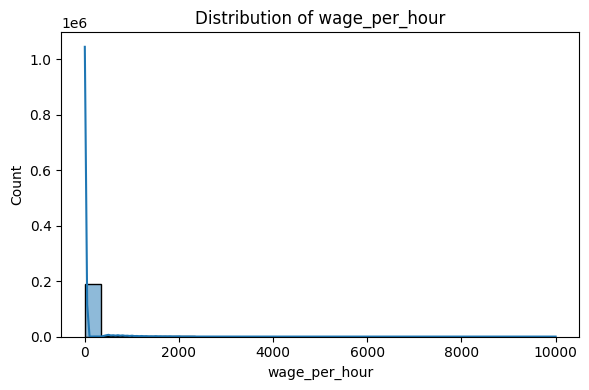

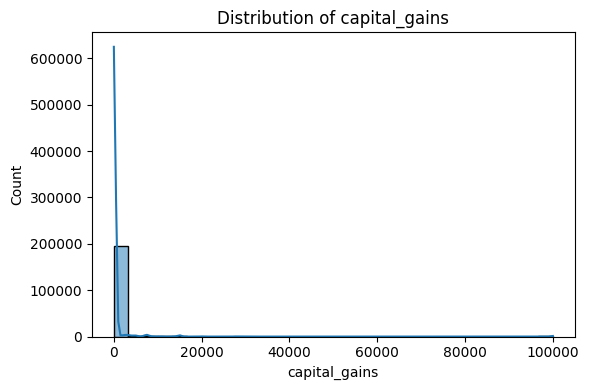

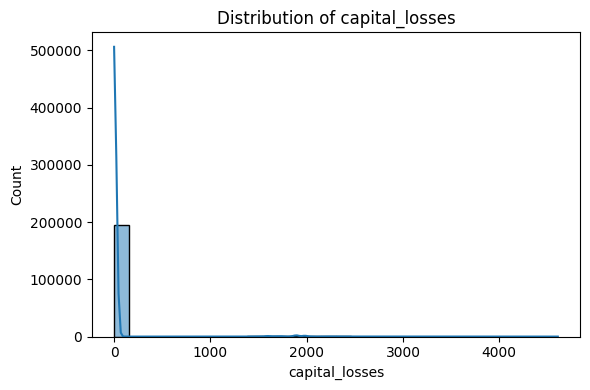

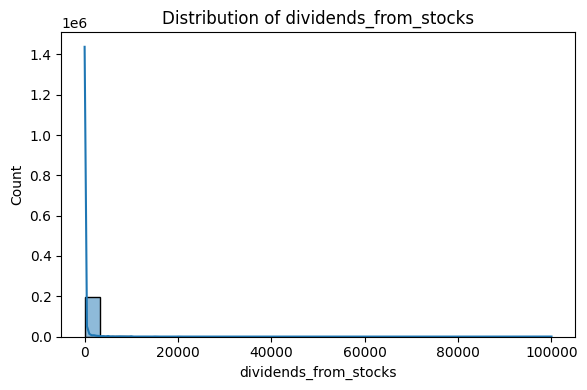

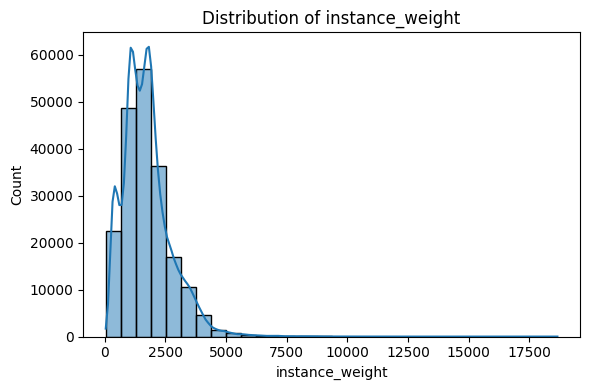

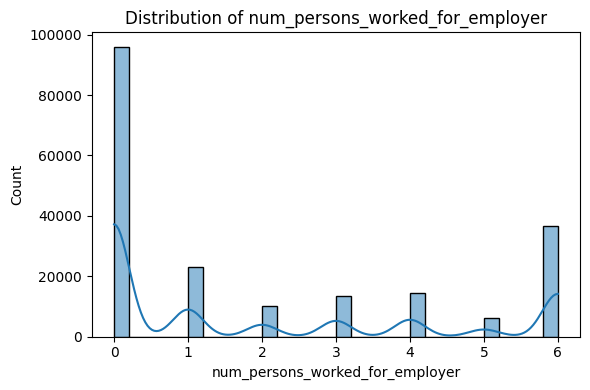

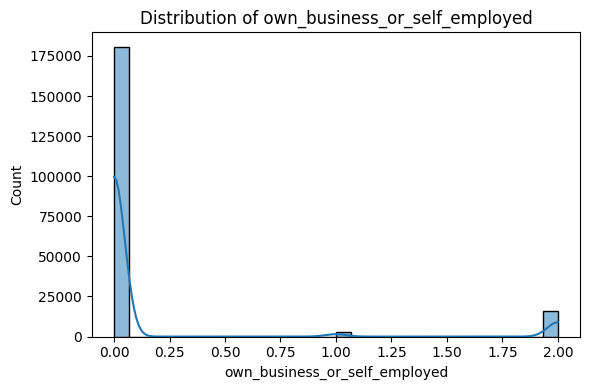

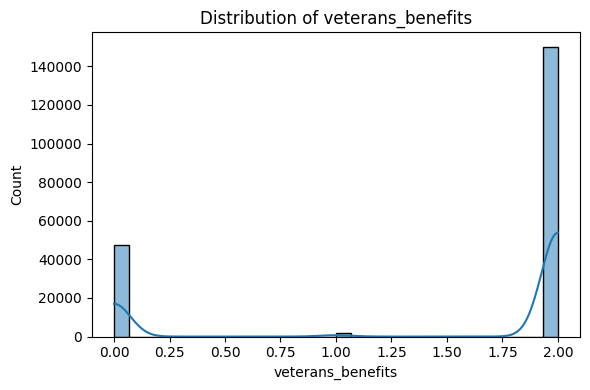

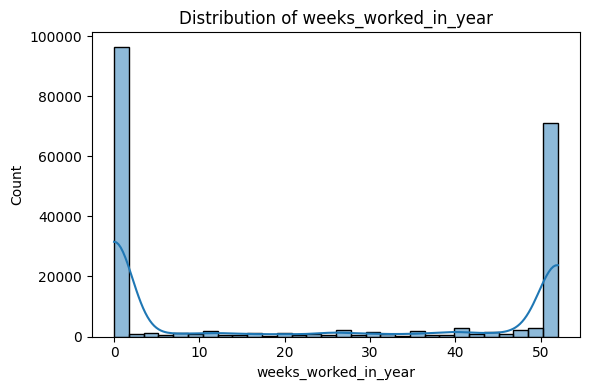

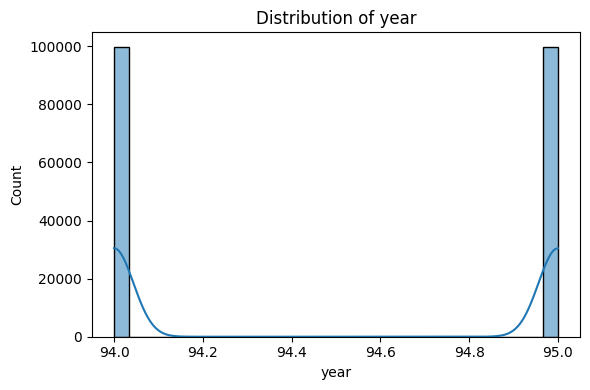

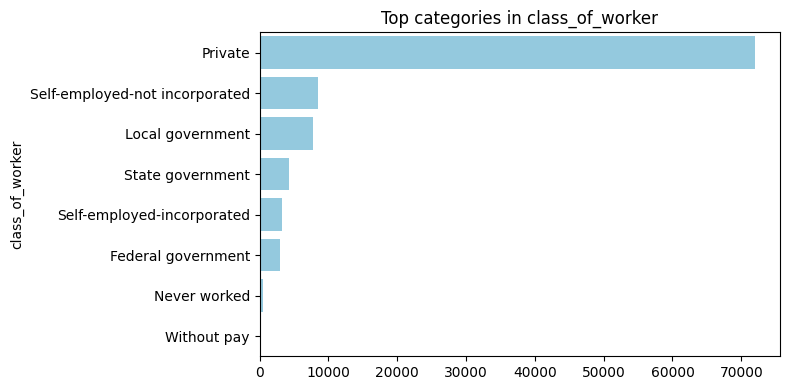

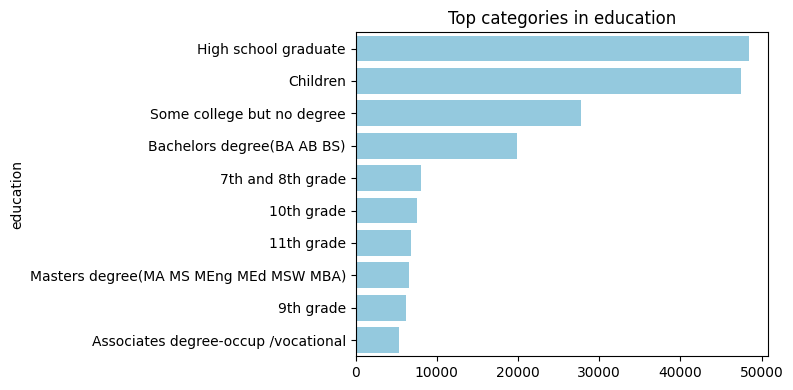

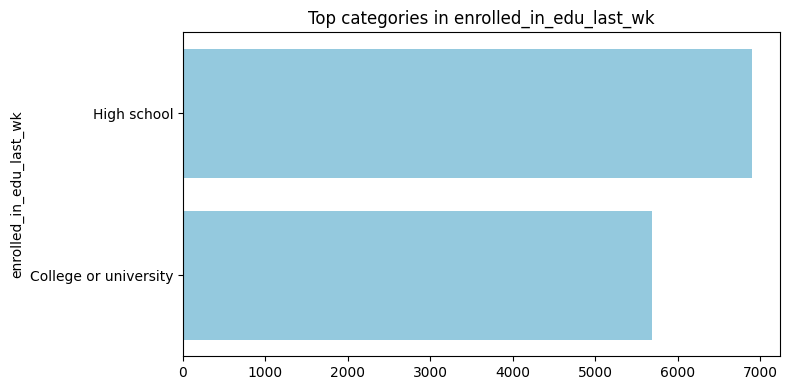

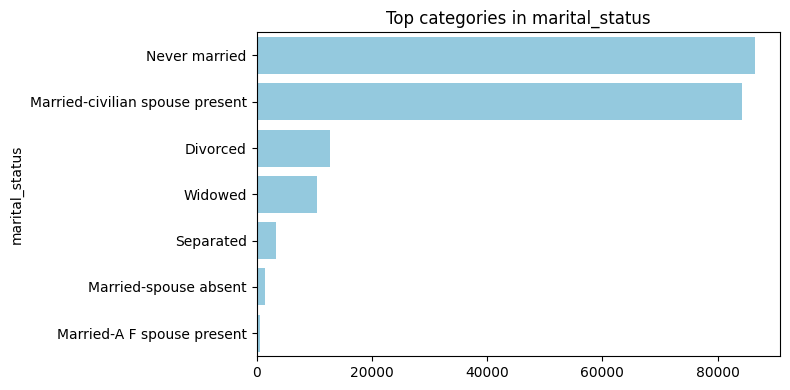

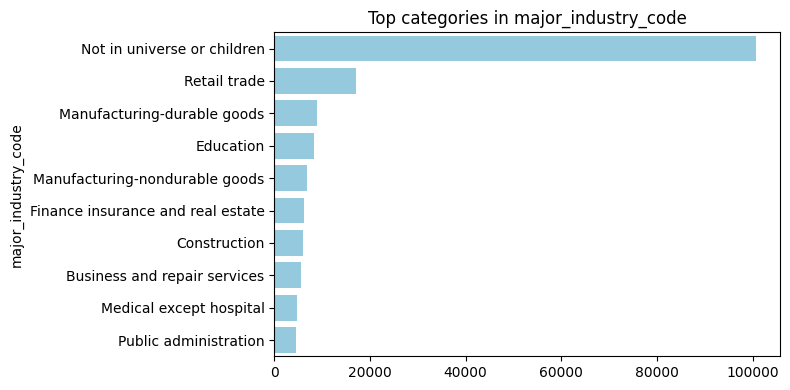

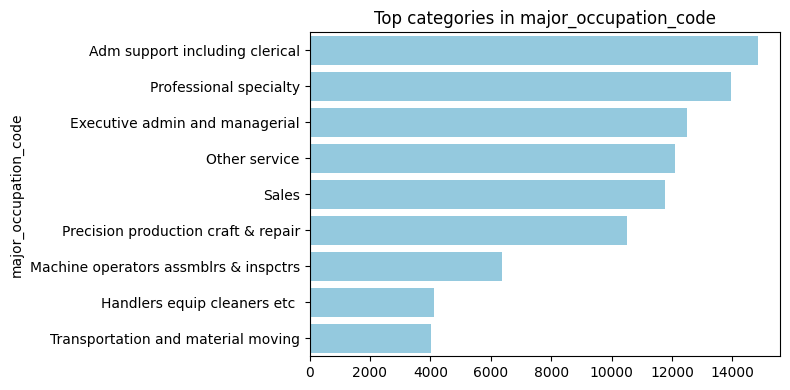

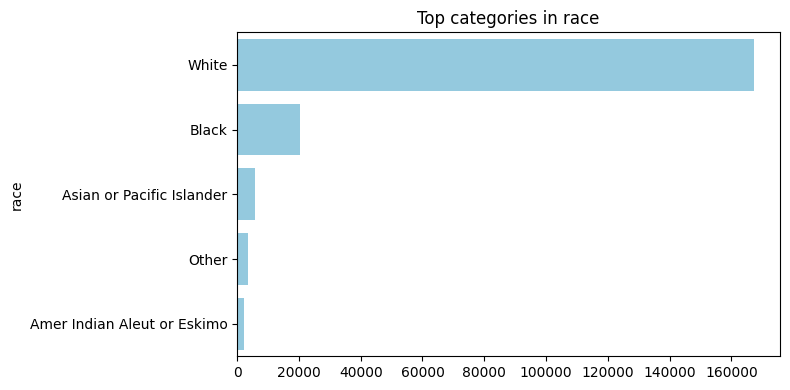

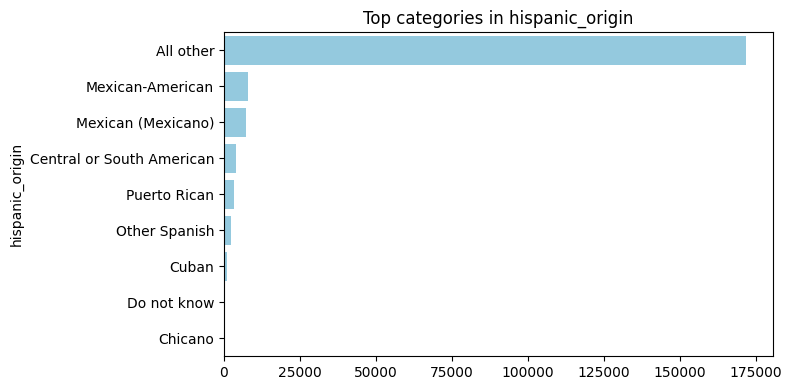

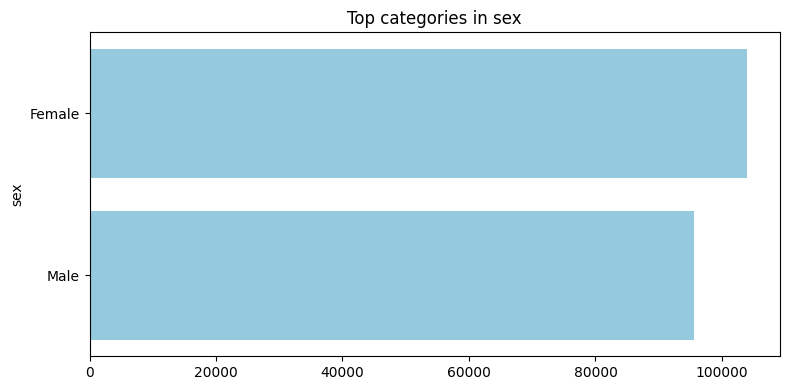

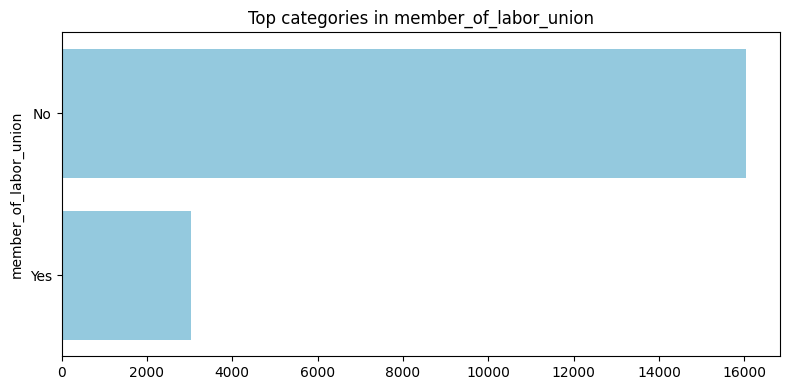

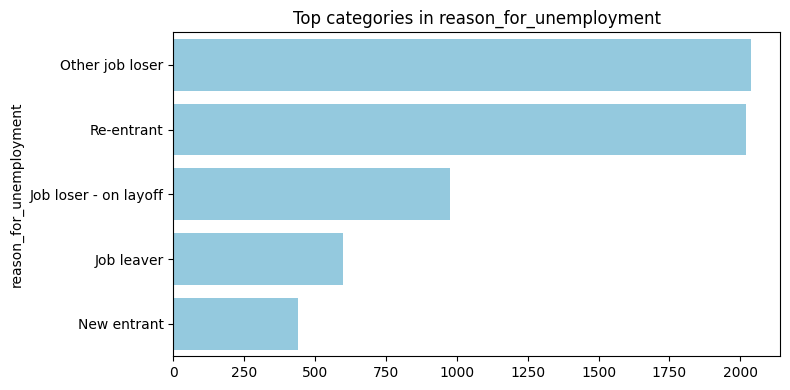

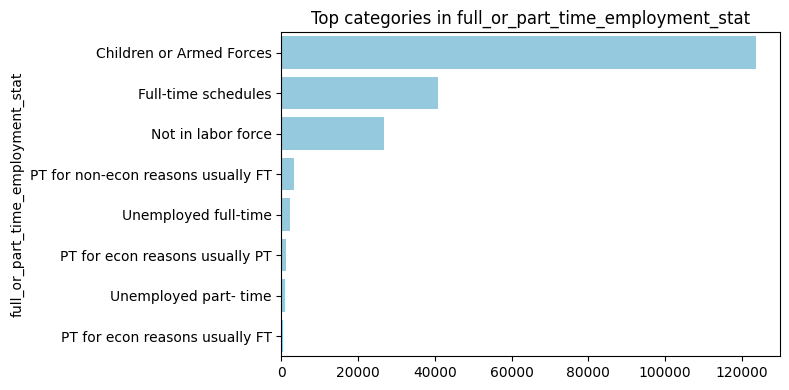

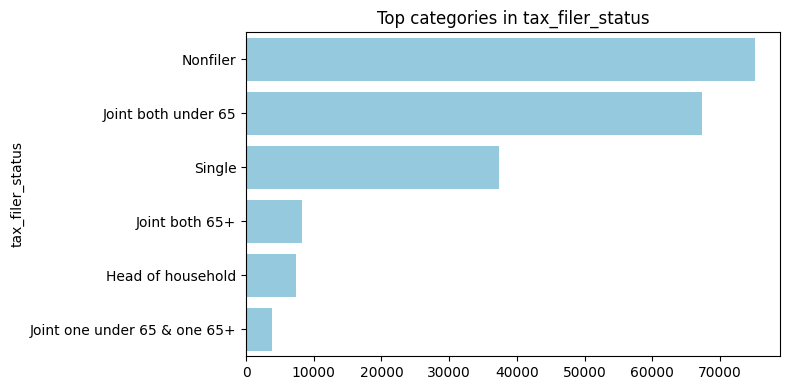

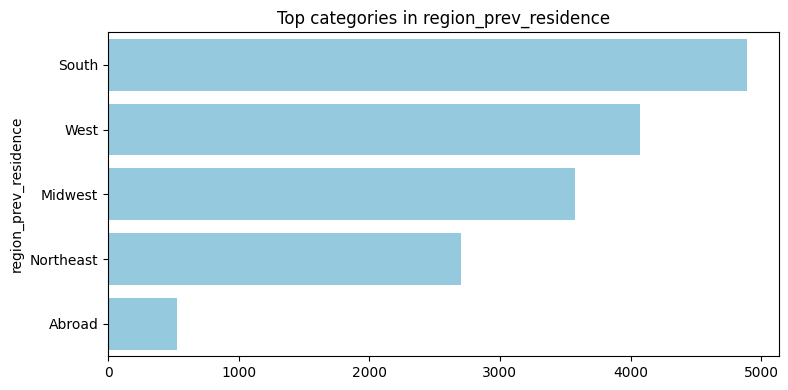

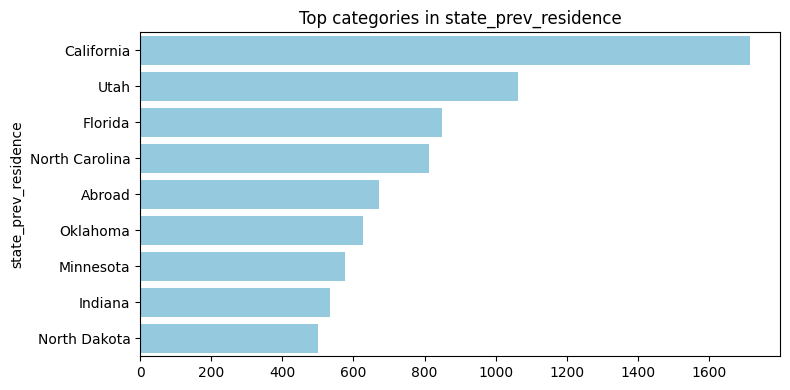

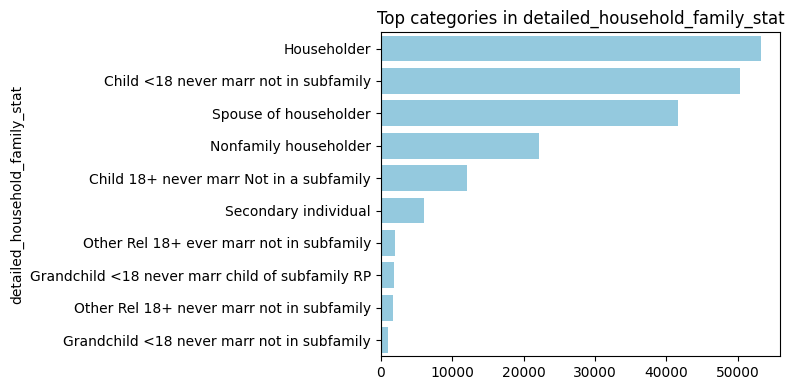

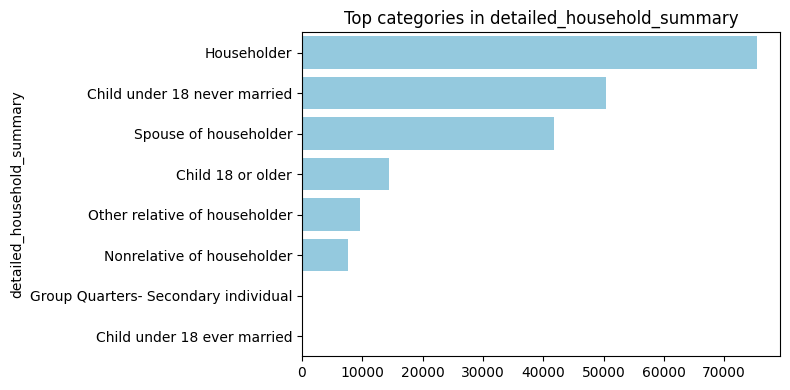

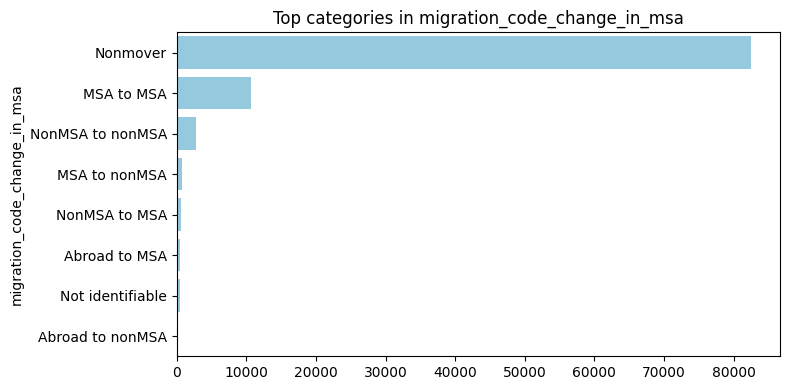

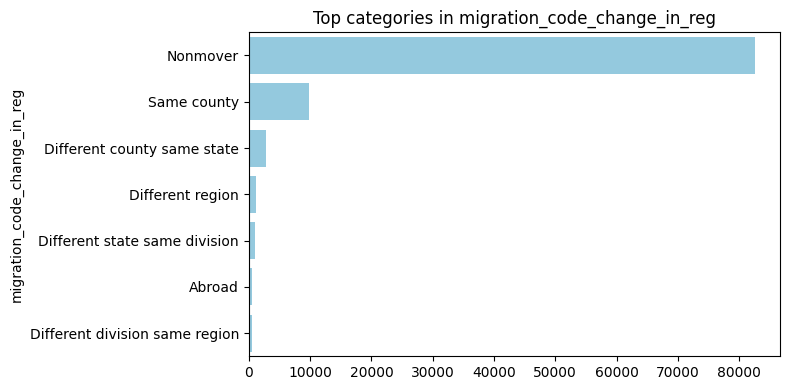

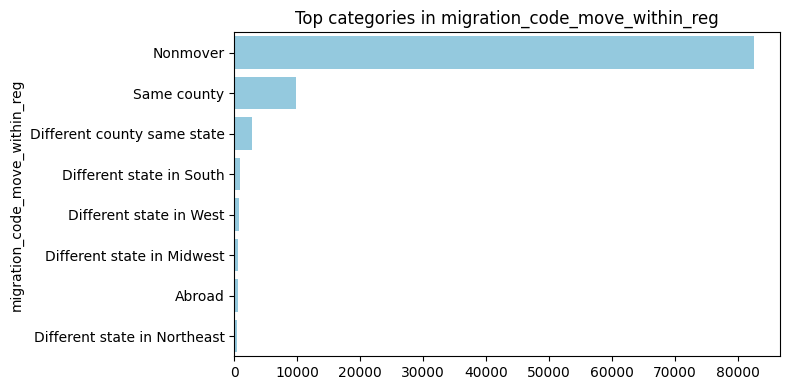

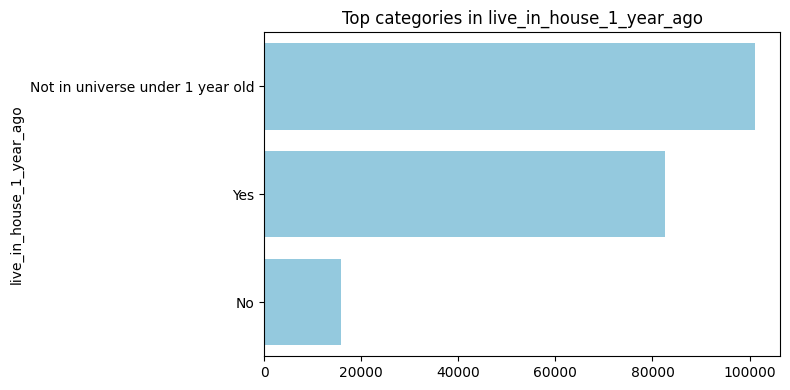

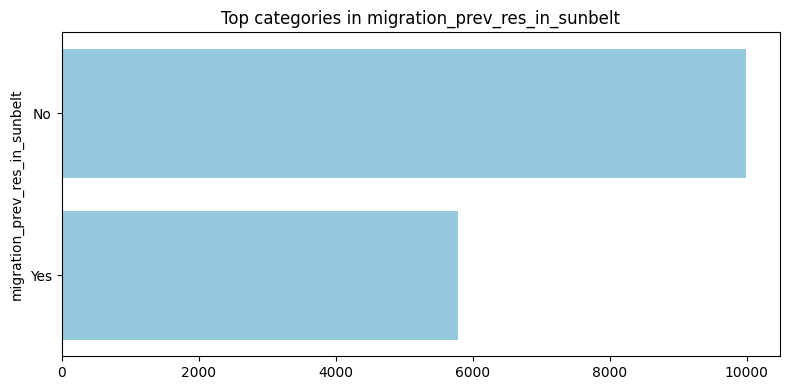

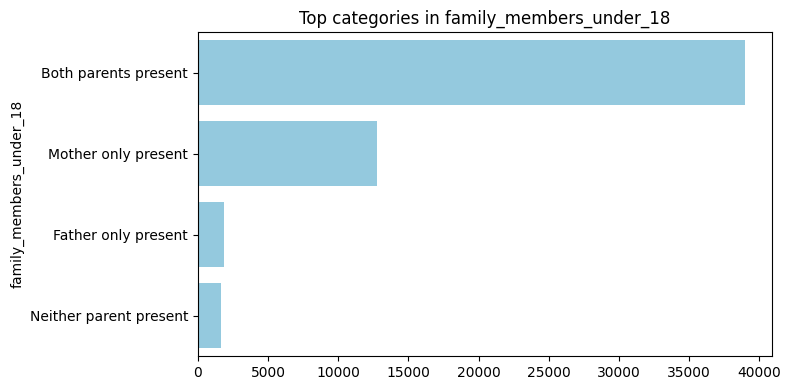

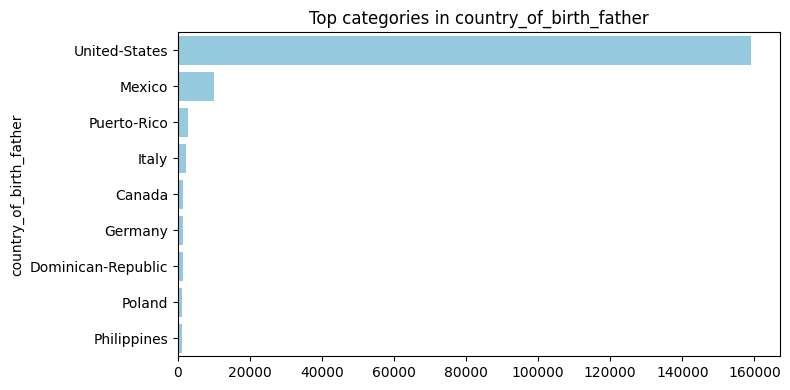

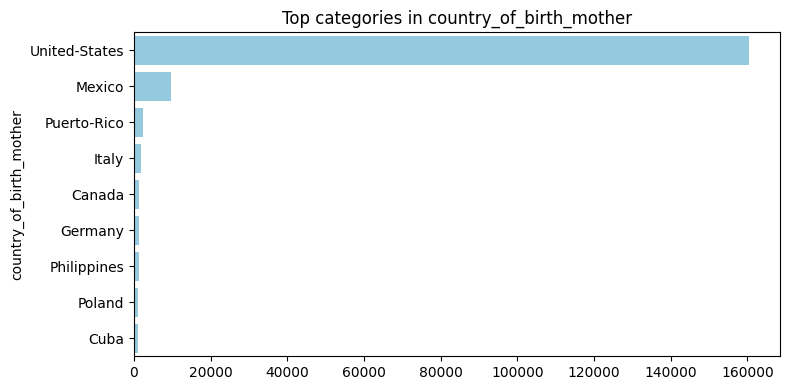

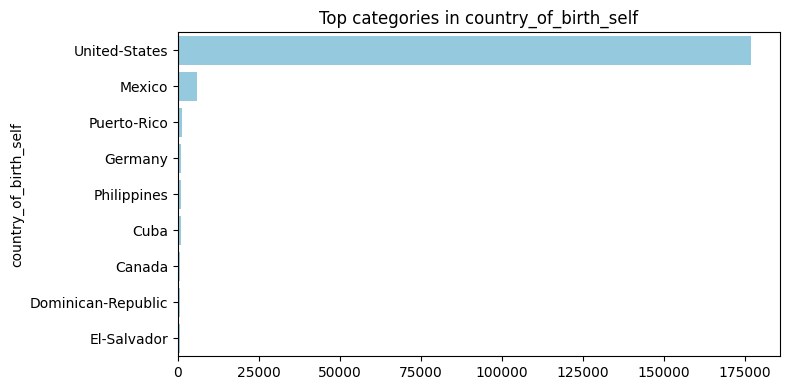

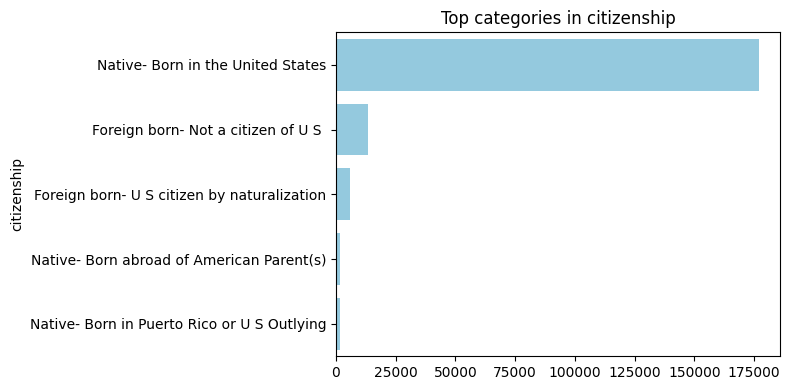

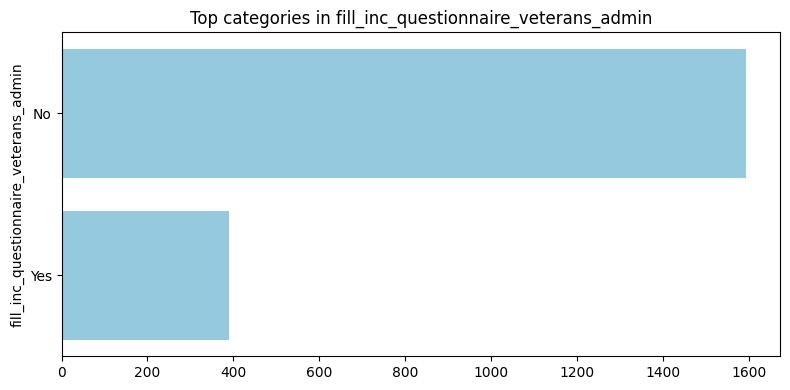

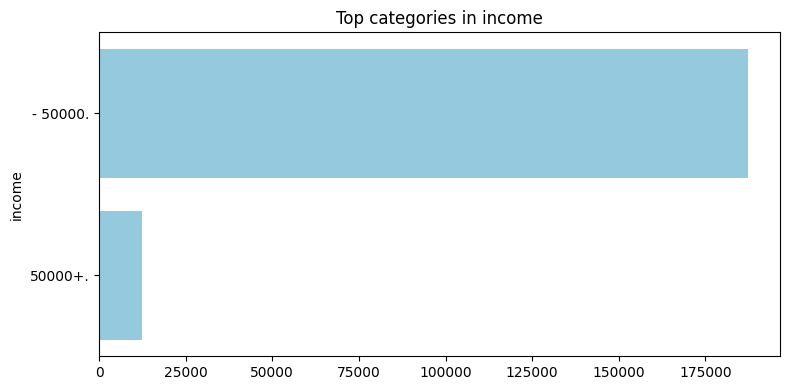

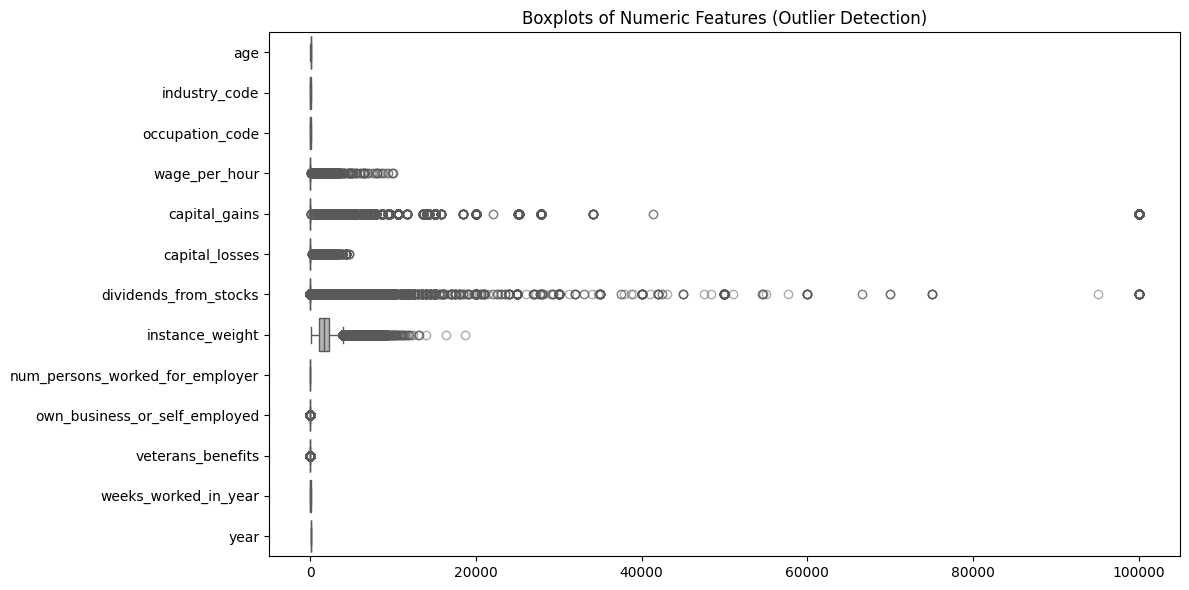

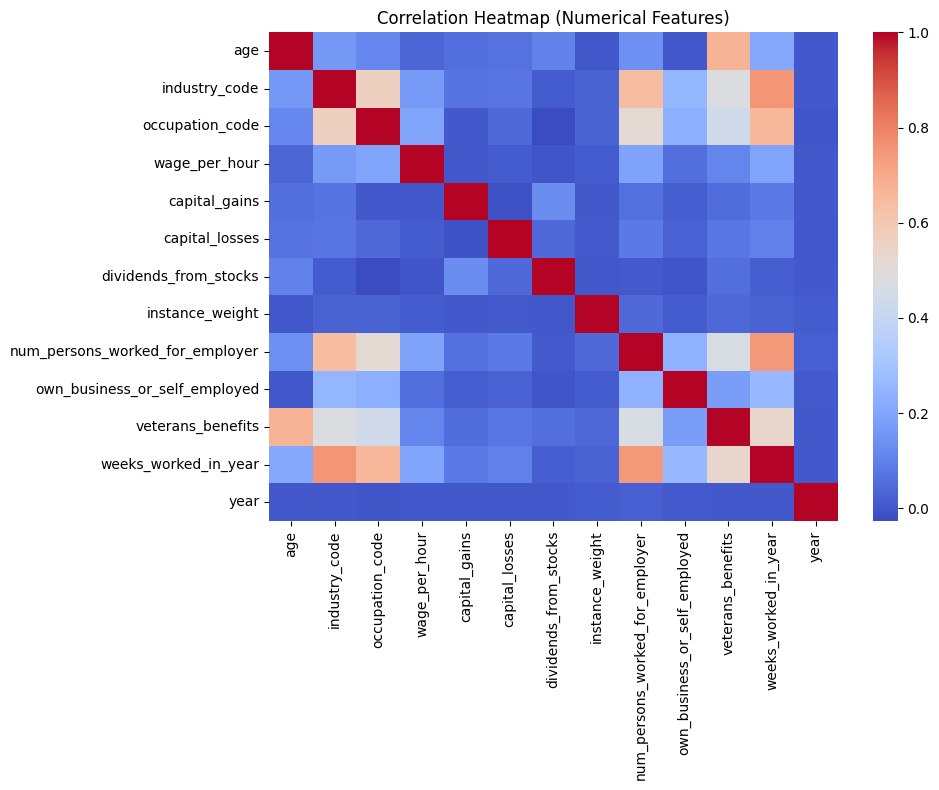


--- Categorical Columns Summary ---
                                   Column  Unique Values  \
0                         class_of_worker              9   
1                               education             17   
2                 enrolled_in_edu_last_wk              3   
3                          marital_status              7   
4                     major_industry_code             24   
5                   major_occupation_code             15   
6                                    race              5   
7                         hispanic_origin             10   
8                                     sex              2   
9                   member_of_labor_union              3   
10                reason_for_unemployment              6   
11      full_or_part_time_employment_stat              8   
12                       tax_filer_status              6   
13                  region_prev_residence              6   
14                   state_prev_residence             50   
15 

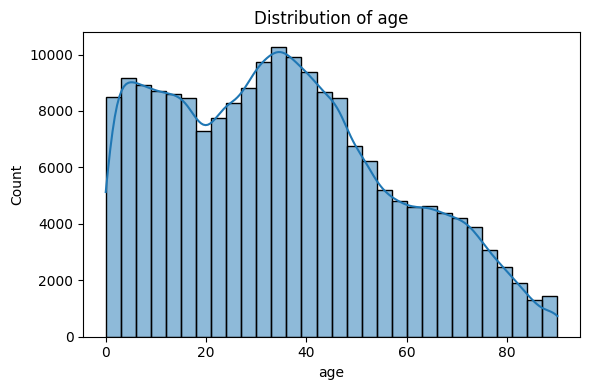

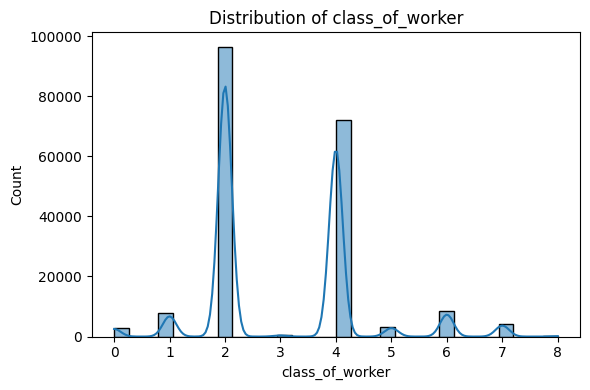

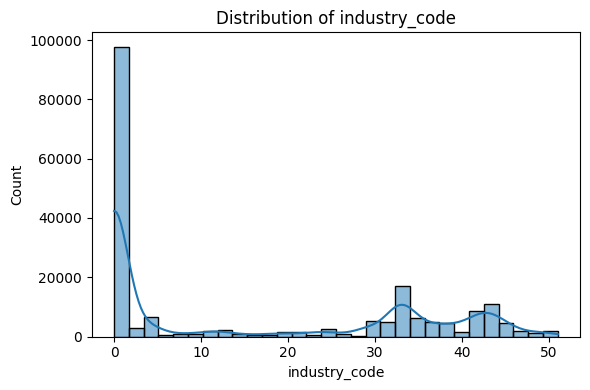

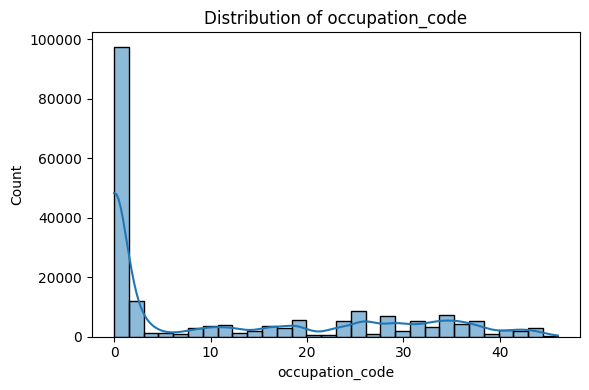

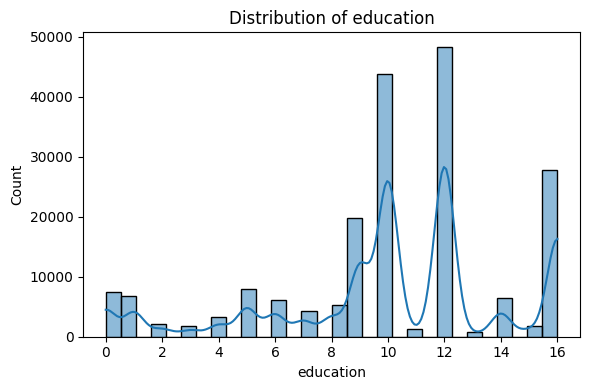

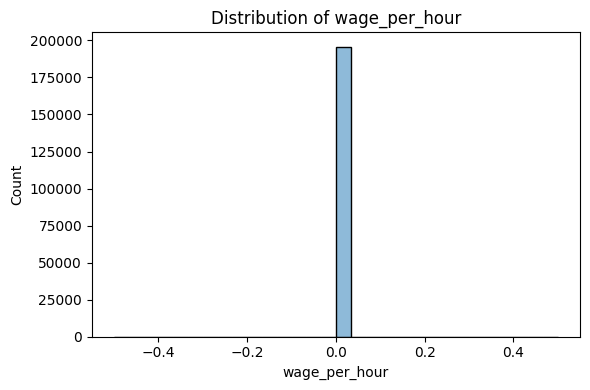

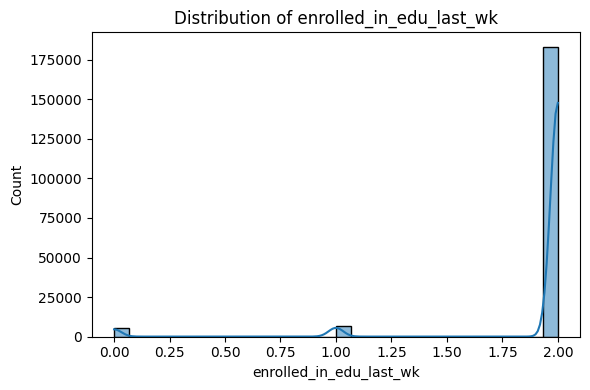

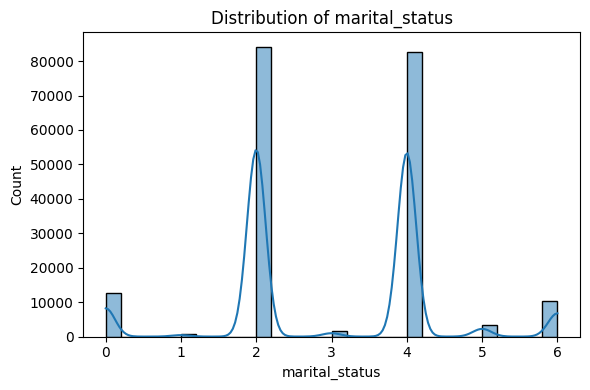

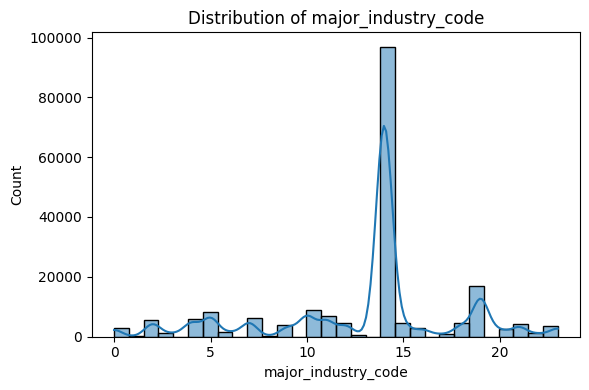

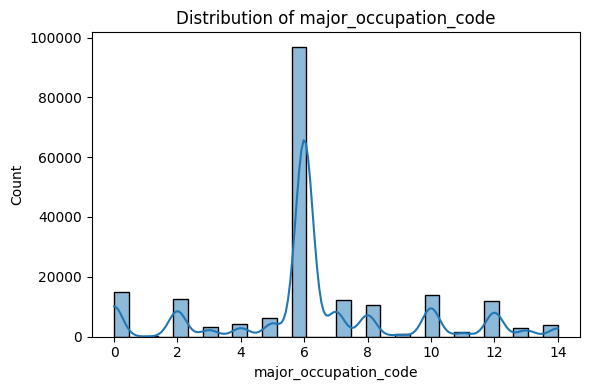

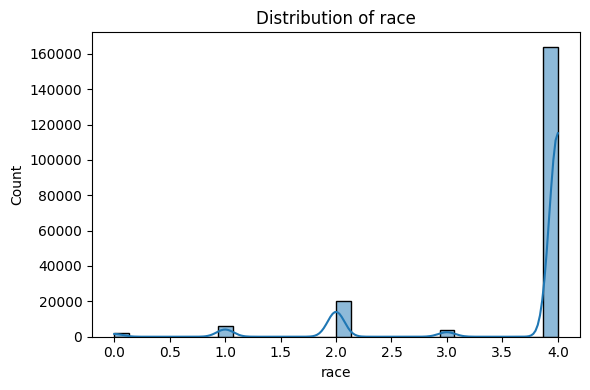

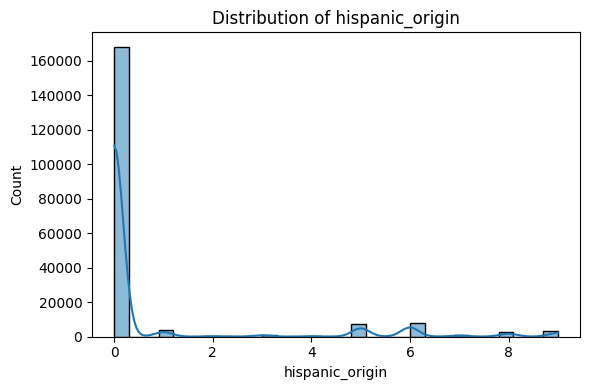

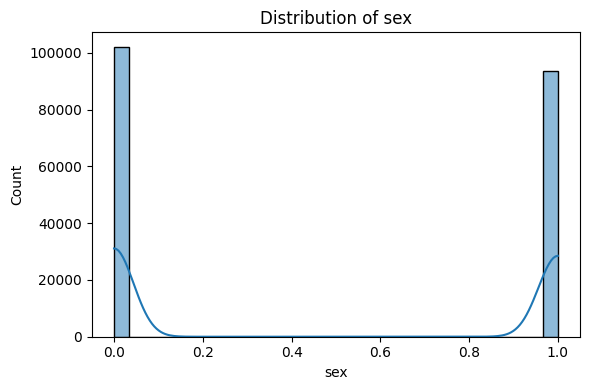

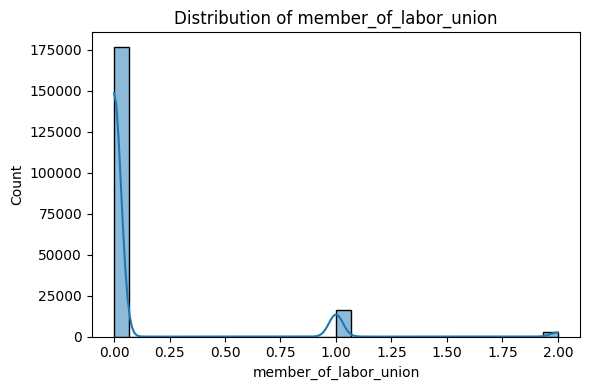

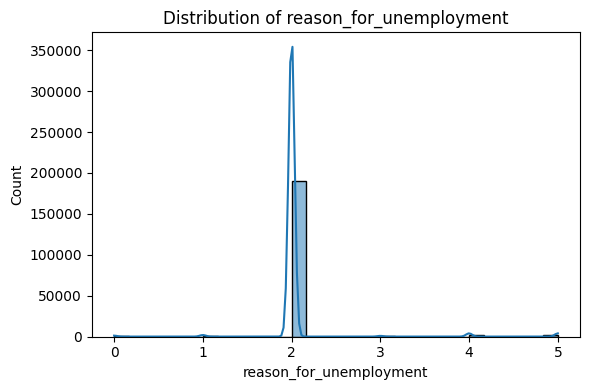

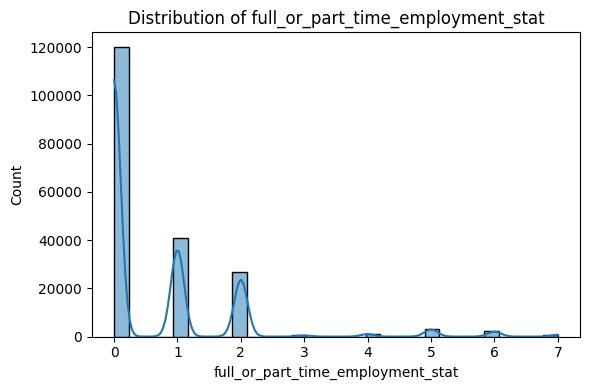

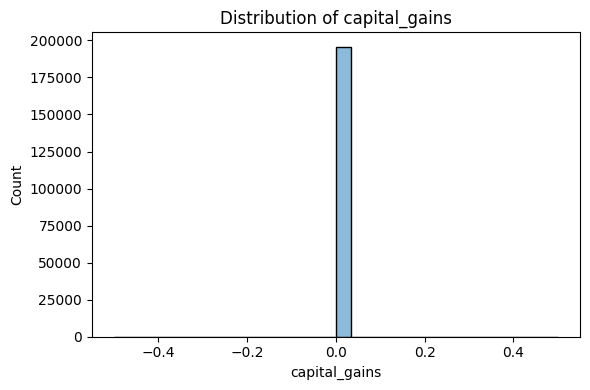

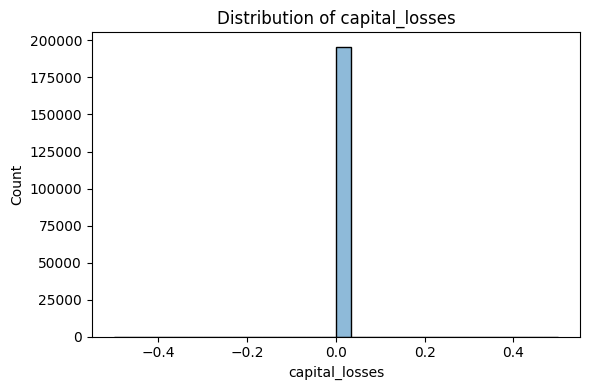

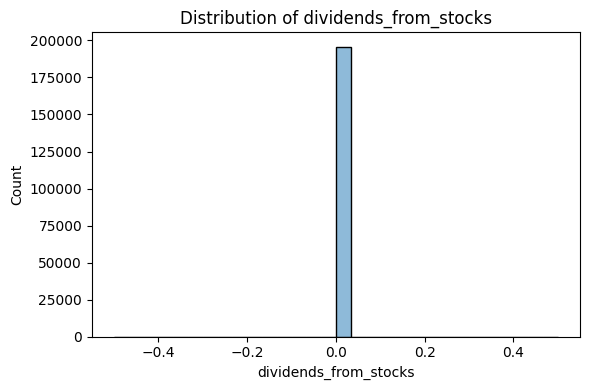

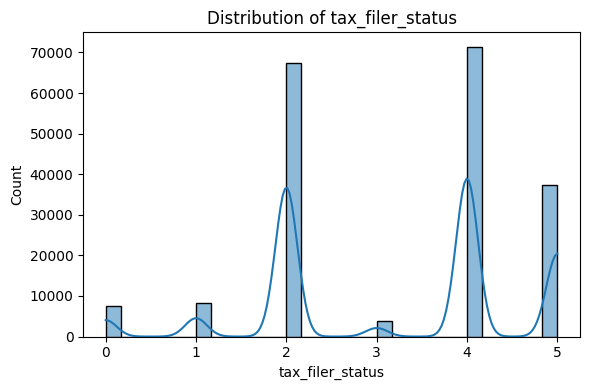

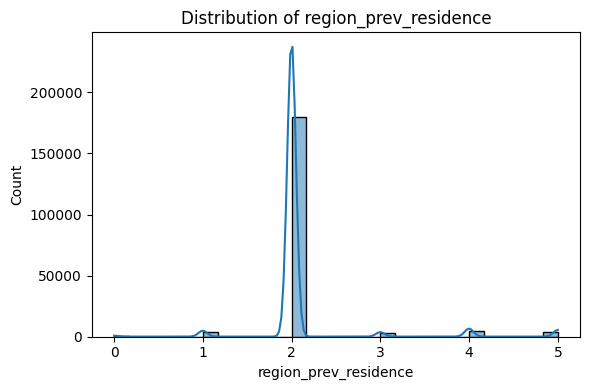

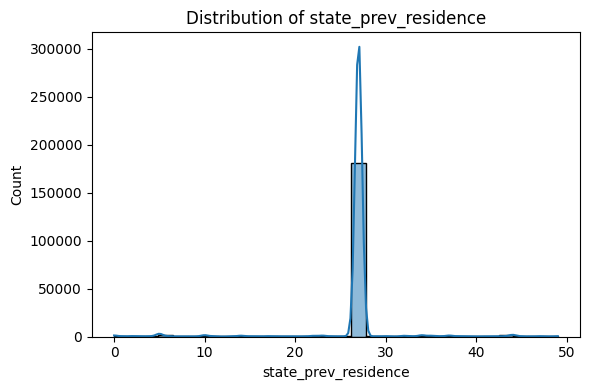

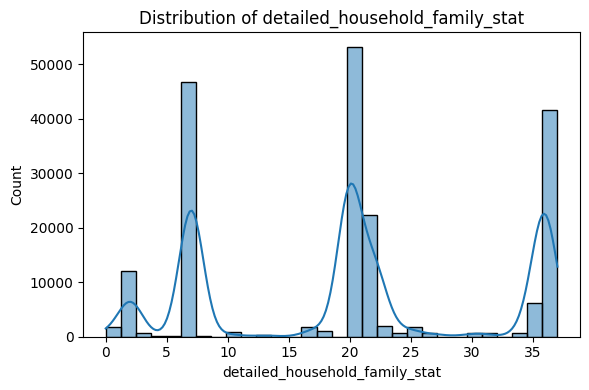

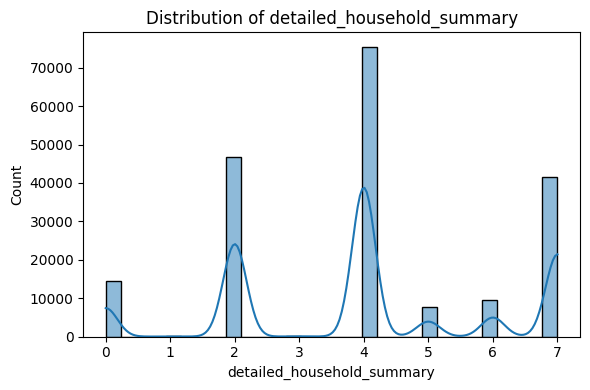

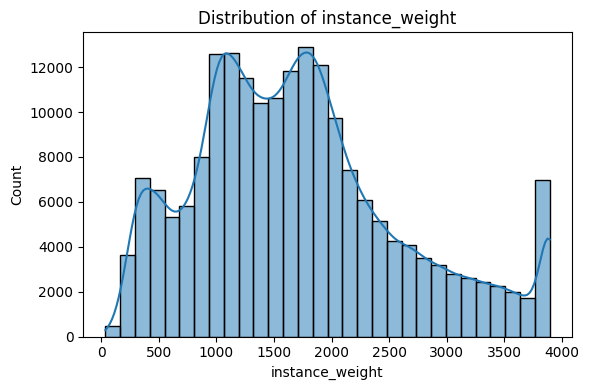

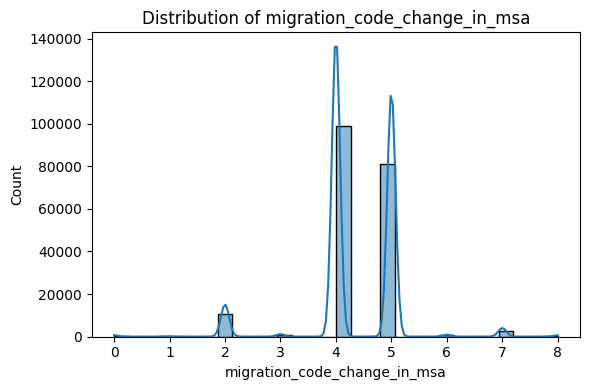

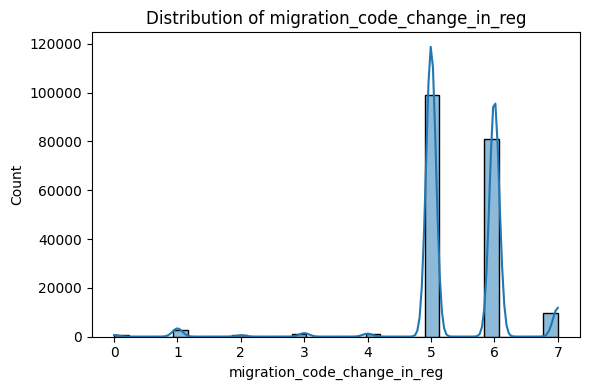

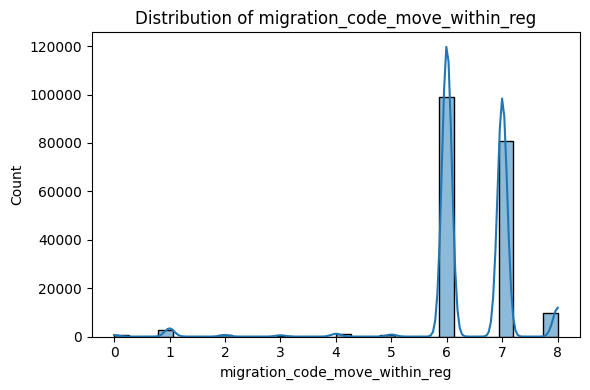

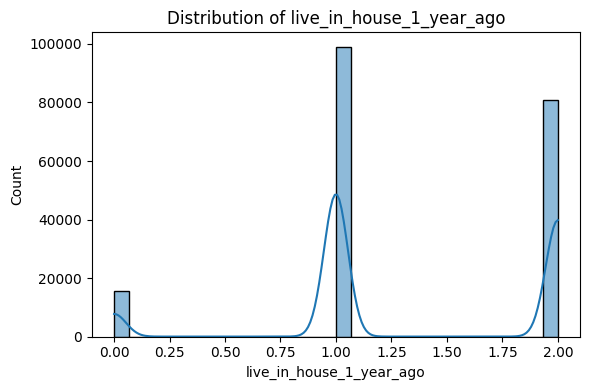

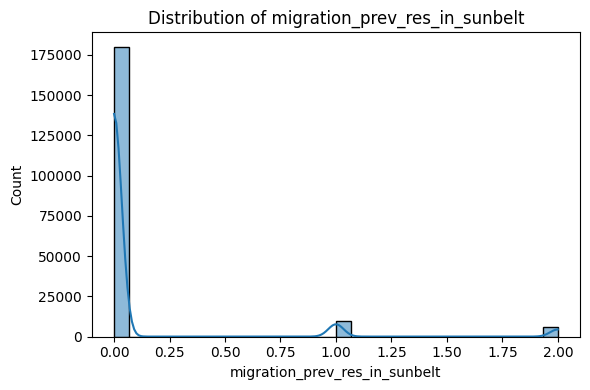

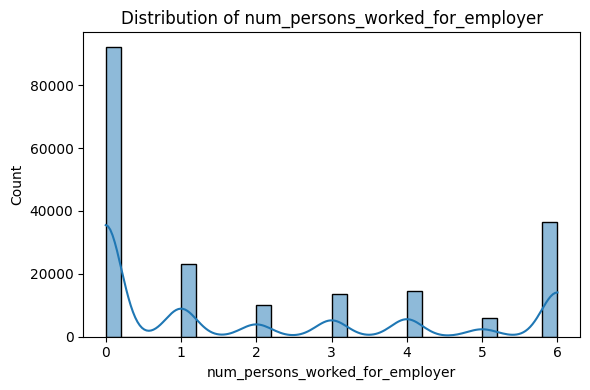

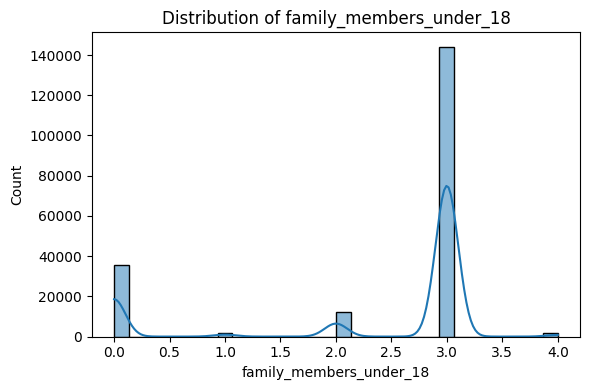

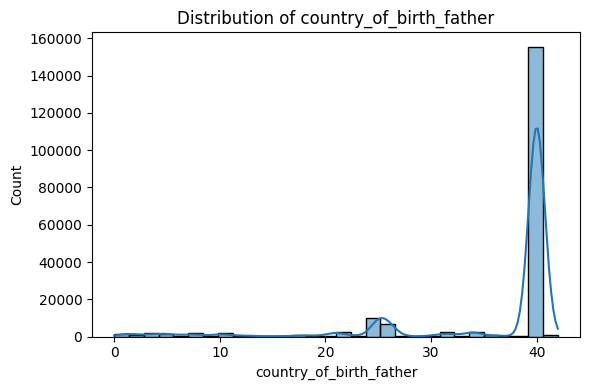

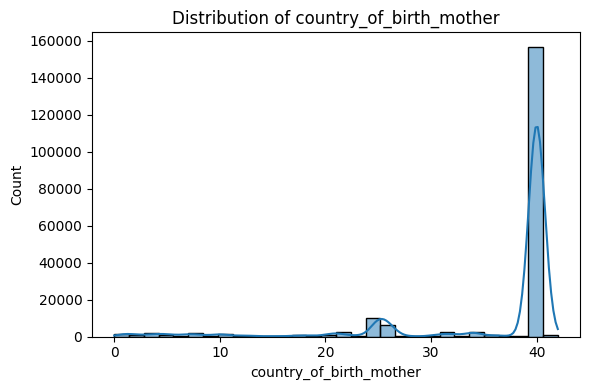

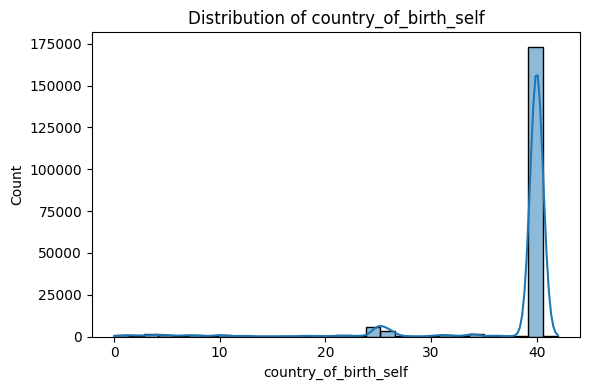

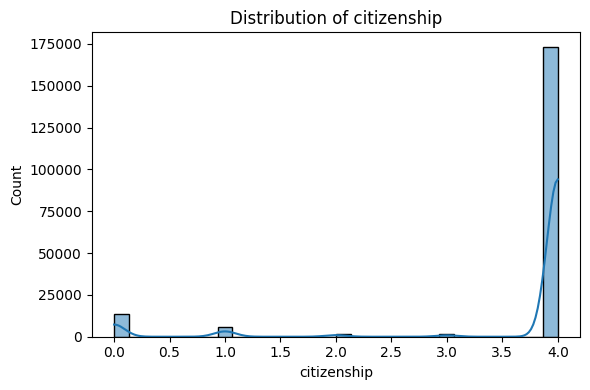

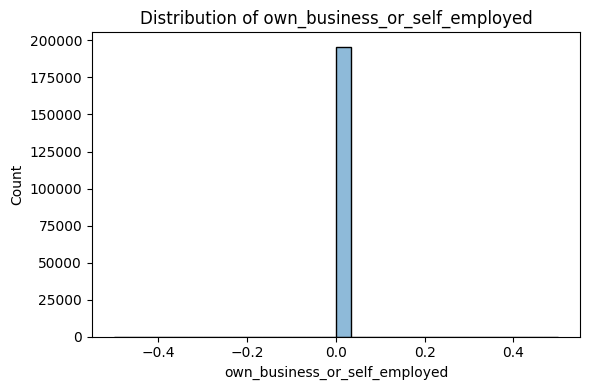

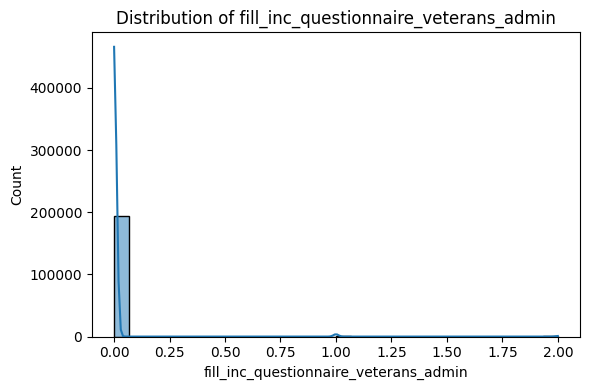

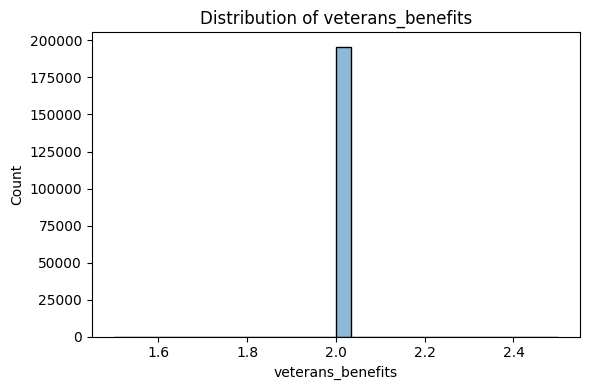

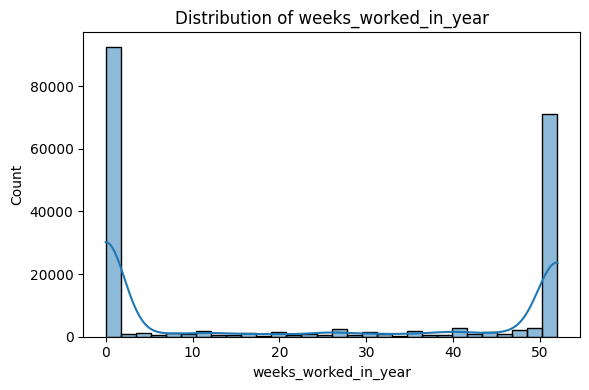

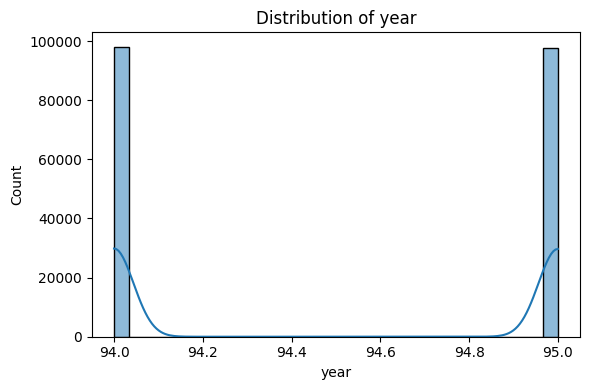

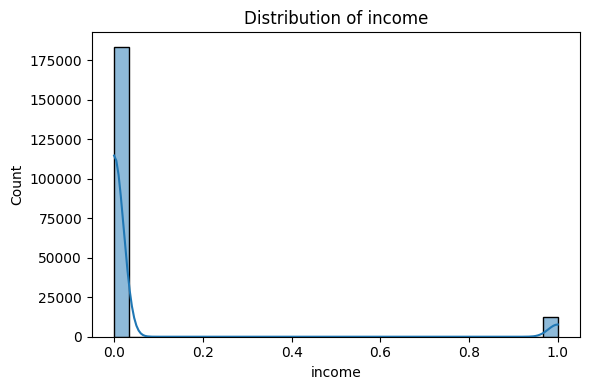

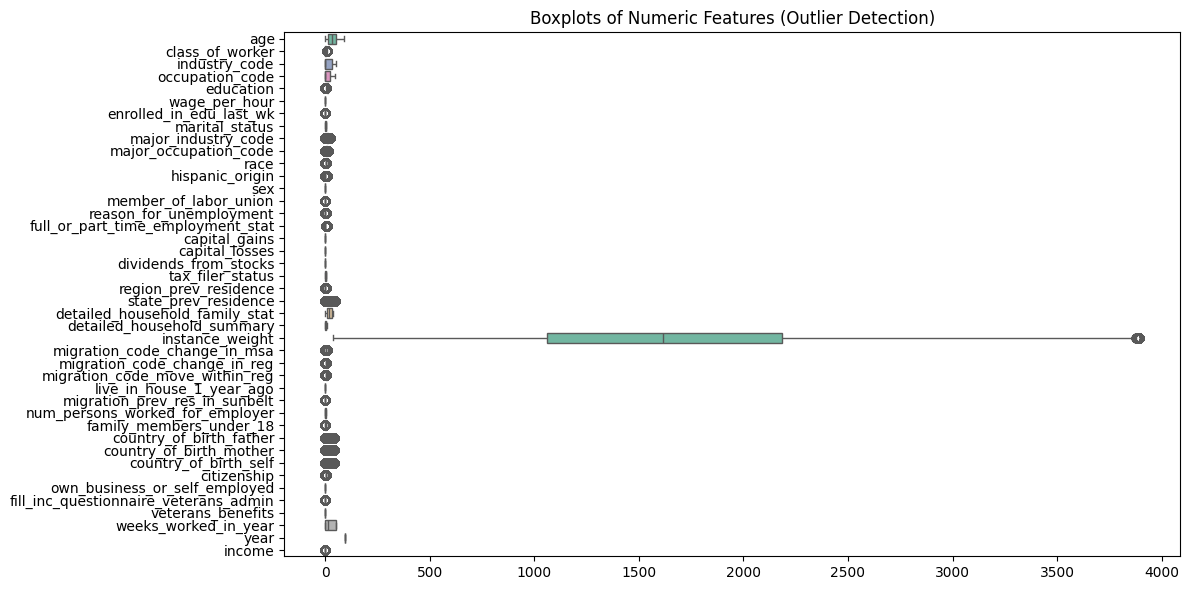

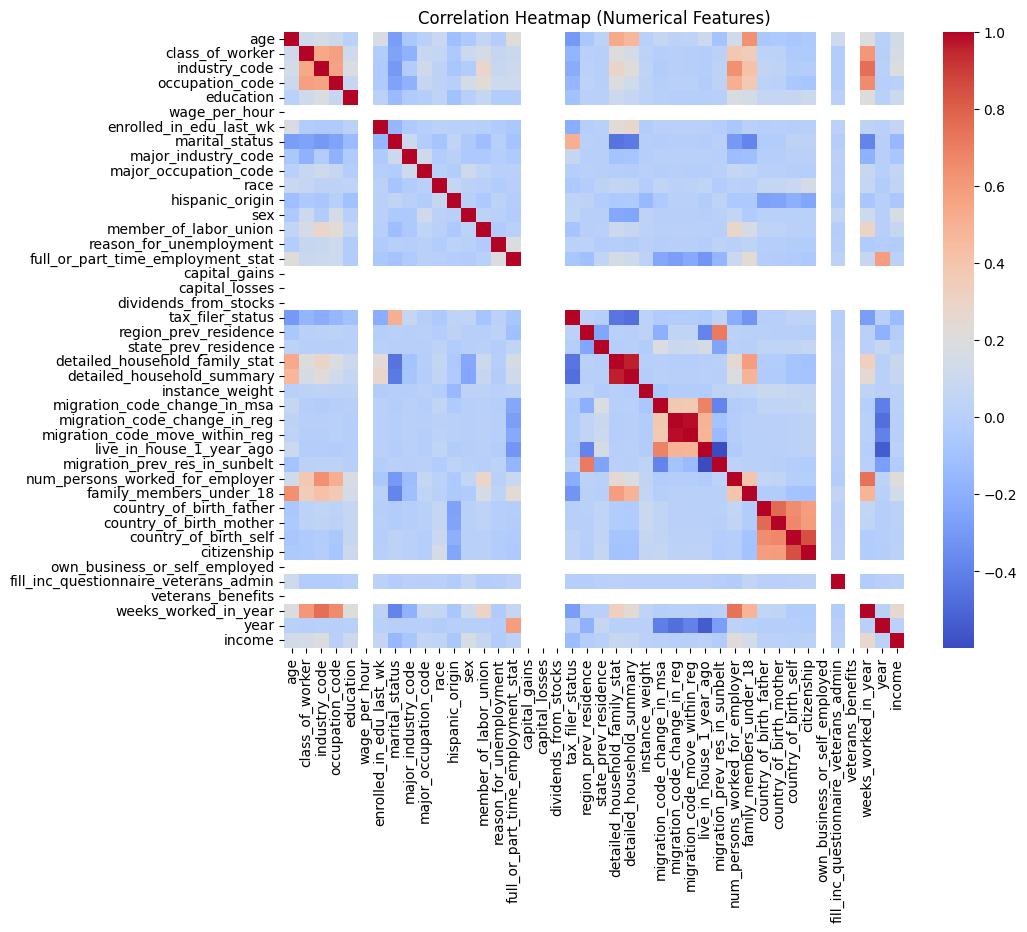

In [4]:
from google.colab import files
uploaded = files.upload()


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#----------------------------------------------------Convert Data to csv----------------------------------------------------------
columns = [
    "age", "class_of_worker", "industry_code", "occupation_code", "education",
    "wage_per_hour", "enrolled_in_edu_last_wk", "marital_status",
    "major_industry_code", "major_occupation_code", "race", "hispanic_origin",
    "sex", "member_of_labor_union", "reason_for_unemployment",
    "full_or_part_time_employment_stat", "capital_gains", "capital_losses",
    "dividends_from_stocks", "tax_filer_status", "region_prev_residence",
    "state_prev_residence", "detailed_household_family_stat",
    "detailed_household_summary", "instance_weight",
    "migration_code_change_in_msa", "migration_code_change_in_reg",
    "migration_code_move_within_reg", "live_in_house_1_year_ago",
    "migration_prev_res_in_sunbelt", "num_persons_worked_for_employer",
    "family_members_under_18", "country_of_birth_father",
    "country_of_birth_mother", "country_of_birth_self", "citizenship",
    "own_business_or_self_employed", "fill_inc_questionnaire_veterans_admin",
    "veterans_benefits", "weeks_worked_in_year", "year", "income"
]

df = pd.read_csv(
    "census-income.data",
    header=None,
    names=columns,
    na_values=["?"],
    skipinitialspace=True
)
df.to_csv("census_income.csv", index=False)

#----------------------------------------------------EDA Before----------------------------------------------------------

DATA_PATH = "census_income.csv"

# Treat ?, blank cells as missing
na_values = ["?", "", "Not in universe"]
df = pd.read_csv(DATA_PATH, na_values=na_values)

# Step 1: Basic dataset info
print("\n--- Shape ---\n", df.shape)
print("\n--- Column Names ---\n", df.columns.tolist())
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Missing values per column ---\n", df.isnull().sum())
print("\n--- Summary statistics (numeric) ---\n", df.describe().T)
print("\n--- Summary statistics (categorical) ---\n", df.describe(include=[object]).T)
print("\n--- Duplicates ---\n", df.duplicated().sum())


# Step 2: Distribution plots (numeric features)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# Step 3: Bar plots (categorical features)
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    vc = df[col].value_counts(dropna=False).nlargest(10)
    sns.barplot(x=vc.values, y=vc.index, color="skyblue")
    plt.title(f"Top categories in {col}")
    plt.tight_layout()
    plt.show()

# Step 4: Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df[num_cols],
    orient="h",
    palette="Set2",
    flierprops={"marker": "o", "color": "red", "alpha": 0.5}
)
plt.title("Boxplots of Numeric Features (Outlier Detection)")
plt.tight_layout()
plt.show()

# Step 5: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()

#-------------------------------------------------------PREPROCESSING-------------------------------------------------------------
DATA_PATH = "census_income.csv"
df = pd.read_csv(DATA_PATH, na_values=na_values)

# Step 1: Standardize categorical string values
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Step 2: Drop duplicate rows
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

# Step 3: Handle missing values
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Step 4: Handle outliers with IQR capping (skip 'year')
for col in num_cols:
    if col in ["year"]:
        continue
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

# Step 5: Encode categorical features
print("\n--- Categorical Columns Summary ---")
summary = pd.DataFrame({
    "Column": cat_cols,
    "Unique Values": [df[c].nunique() for c in cat_cols],
    "Sample Categories": [df[c].unique()[:5] for c in cat_cols]
})
print(summary)

for col in cat_cols:
    n_unique = df[col].nunique()

    if n_unique > 2:   # Label Encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"\nLabel Encoded: {col} ({n_unique} categories)")
        print("Mapping:", mapping)

    elif n_unique == 2:   # Binary Encoding
        unique_vals = list(df[col].unique())
        mapping = {val: idx for idx, val in enumerate(unique_vals)}
        df[col] = df[col].map(mapping).astype(int)
        print(f"\nBinary Encoded: {col} ({n_unique} categories → 0/1)")
        print("Mapping:", mapping)

    else:   # One-hot encoding
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True).astype(int)
        dummies.index = df.index
        df = pd.concat([df.drop(columns=[col]), dummies], axis=1)
        print(f"\nOne-Hot Encoded: {col} ({n_unique} categories)")

# Step 6: Save preprocessed dataset
print("\n--- After Preprocessing ---")
print(df.head())
print("\nShape:", df.shape)
# Drop duplicates after encoding
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

OUTPUT_PATH = "census_income_cleaned.csv"
df.to_csv(OUTPUT_PATH, index=False)

#---------------------------------------------------EDA AFTER-----------------------------------------------------------------------
df = pd.read_csv(OUTPUT_PATH)

print("\n--- Shape ---", df.shape)
print("\n--- Column Names ---", df.columns.tolist())
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Missing values per column ---\n", df.isnull().sum())
print("\n--- Summary statistics (numeric) ---\n", df.describe().T)
print("\n--- Duplicates ---", df.duplicated().sum())

# Distribution plots (numerical)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient="h", palette="Set2",
            flierprops={"marker": "o", "color": "red", "alpha": 0.5})
plt.title("Boxplots of Numeric Features (Outlier Detection)")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()